# Analysis of queue throughput measurements

In [206]:
import pandas as pd

In [207]:
df = pd.read_csv("measurements.csv")

In [208]:
# remove older runs for each version
latest = {}
for v in df["version"].unique():
    df1 = df.loc[df["version"] == v]
    latest[v] = df1['run'].max()

for version, run in latest.items():
    df.drop(df[(df.version == version) & (df.run < run)].index, inplace=True)


In [209]:
def plot_profile(profile):
    df1 = df.loc[df["profile"] == profile]
    df2: pd.DataFrame = df1.pivot(index='items', columns='version', values='throughput')
    plt = df2.plot(title=f"Throughput with profile {profile} (#{run})", style='.-')
    plt.set_ylim(bottom=0)
    plt

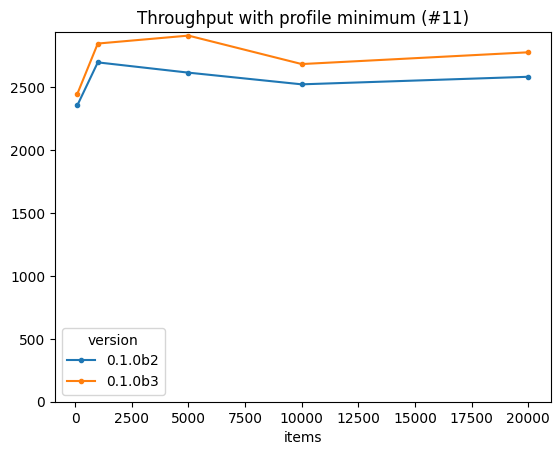

In [210]:
plot_profile("minimum")

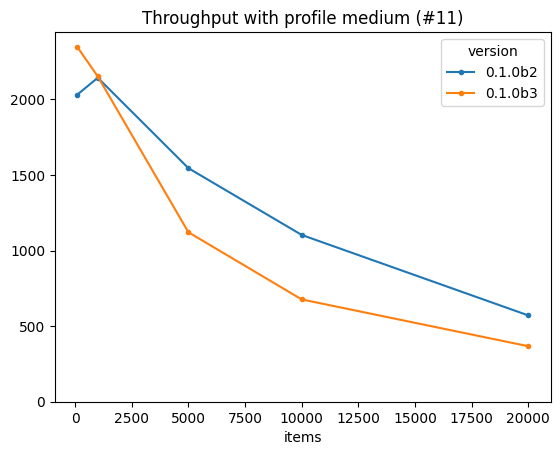

In [211]:
plot_profile("medium")

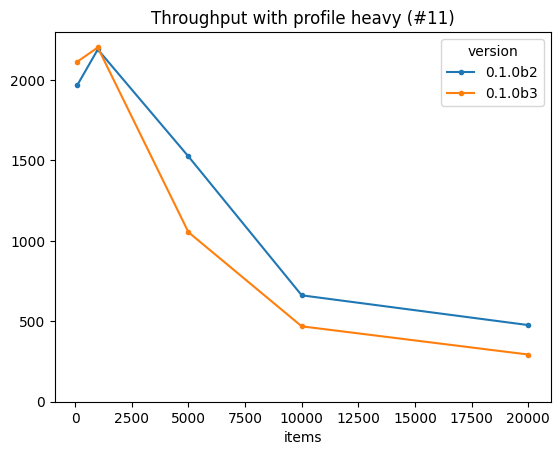

In [212]:
plot_profile("heavy")

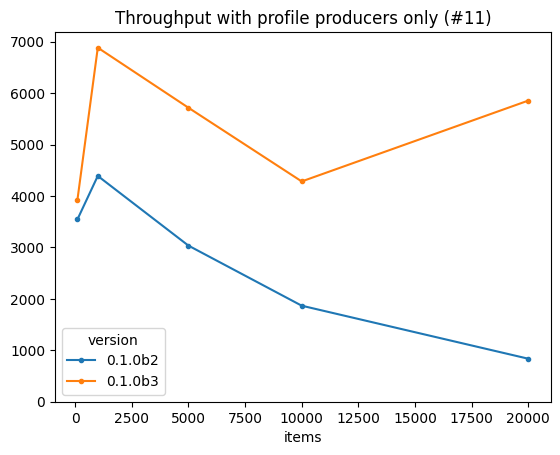

In [213]:
plot_profile("producers only")